# **Proyek Akhir: Deteksi Dini Mahasiswa Dropout di Institut Jaya Jaya Menggunakan Analisis Data dan Pembelajaran Mesin**

- Nama: Yogik Septiadi
- Email: yogikseptiadi@gmail.com
- Id Dicoding: yogik22

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,1.150000e+01,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,1.434500e+04,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000e+00,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,1.414286e+16,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,1.350000e+01,0,8.9,1.4,3.51,Dropout


## Data Understanding

In [5]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4.424000e+03,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,3.928634e+15,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.970124e+15,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,1.100000e+01,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,1.300000e+01,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,1.166667e+16,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,1.857143e+16,12.000000,16.200000,3.700000,3.510000


## Data Preparation / Preprocessing

Karena data sudah termasuk bersih dan tipe datanya sudah terstruktur dengan baik, maka tidak diperlukan proses pra-pemrosesan yang kompleks. Dengan demikian, data sudah dapat langsung digunakan untuk melakukan exploratory data analysis (EDA) guna mengungkap pola atau insight yang relevan.

## Exploratory Data Analysis (EDA)

In [8]:
# Total Mahasiswa
Total= df['Status'].value_counts().sum()
print("Total Mahasiswa :",Total)

Total Mahasiswa : 4424


C:\Users\Yogik\AppData\Local\Temp\ipykernel_13900\2949712906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')


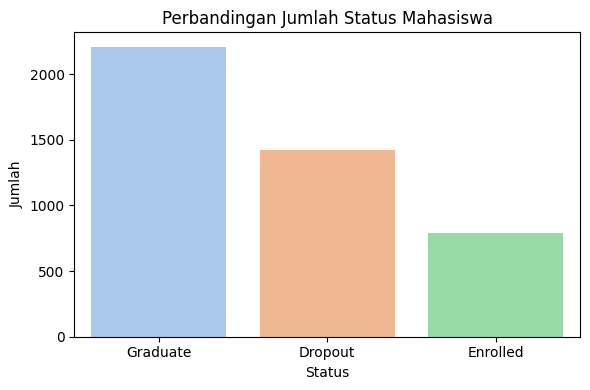

DISTRIBUSI STATUS MAHASISWA:
Graduate: 2209
Dropout: 1421
Enrolled: 794


In [9]:
# Jumalah Keberhasilah Mahasiswa (status)
status_counts = df['Status'].value_counts()


plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')
plt.title('Perbandingan Jumlah Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

print("DISTRIBUSI STATUS MAHASISWA:")
print(f"Graduate: {status_counts['Graduate']}")
print(f"Dropout: {status_counts['Dropout']}")
print(f"Enrolled: {status_counts['Enrolled']}")


Data menunjukkan bahwa mayoritas mahasiswa berhasil menyelesaikan studi mereka, dengan 2209 lulusan, dibandingkan dengan 1421 mahasiswa yang dropout dan 794 yang masih terdaftar. Tingginya angka lulusan mengindikasikan bahwa sistem pendidikan mampu mendukung sebagian besar mahasiswa hingga akhir studi mereka. Namun, angka dropout yang cukup besar menunjukkan adanya tantangan yang dihadapi oleh mahasiswa, seperti faktor akademik, finansial, atau motivasi. Pemahaman lebih lanjut tentang penyebab dropout dapat membantu institusi pendidikan dalam merancang kebijakan untuk meningkatkan retensi mahasiswa dan mendorong lebih banyak keberhasilan akademik.


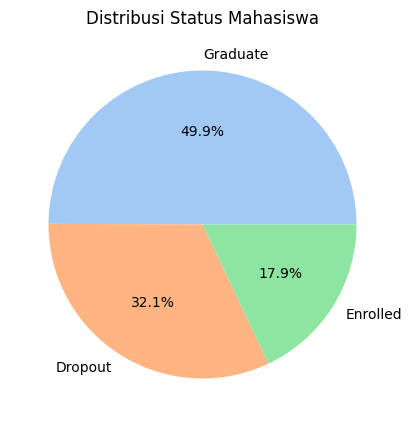

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

plt.title('Distribusi Status Mahasiswa')
plt.show()

C:\Users\Yogik\AppData\Local\Temp\ipykernel_13900\3852732710.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_per_course.sort_values('Graduate_Rate', ascending=False),


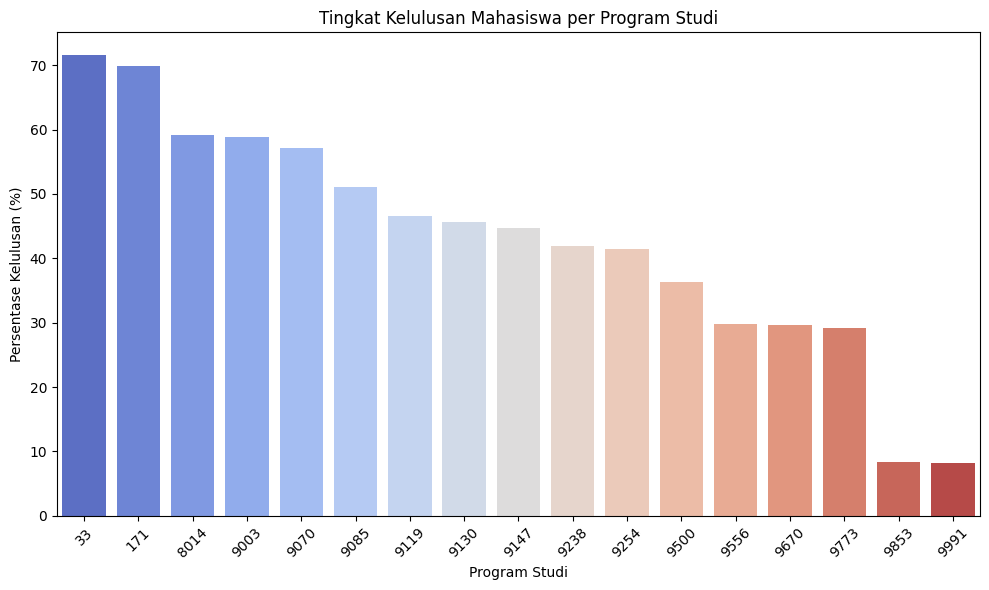

In [11]:
# hitung jumlah status per program studi
status_per_course = df.groupby(['Course', 'Status']).size().unstack(fill_value=0)

# hitung total mahasiswa per course
status_per_course['Total'] = status_per_course.sum(axis=1)

# hitung persentase lulusan
status_per_course['Graduate_Rate'] = (status_per_course['Graduate'] / status_per_course['Total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=status_per_course.sort_values('Graduate_Rate', ascending=False),
            x=status_per_course.index,
            y='Graduate_Rate',
            palette='coolwarm')

plt.title('Tingkat Kelulusan Mahasiswa per Program Studi')
plt.ylabel('Persentase Kelulusan (%)')
plt.xlabel('Program Studi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. 33 - Biofuel Production Technologies
2. 9853 - Basic Education
3. 9991 - Management (evening attendance)

In [43]:
pd.crosstab(df['Course'], df['Status'])

Status,Dropout,Enrolled,Graduate
Course,,,
33,8,3,1
171,82,37,96
8014,71,21,123
9003,86,37,87
9070,51,42,133
9085,90,75,172
9119,92,64,14
9130,78,21,42
9147,134,108,138


Dari data yang diberikan, terlihat bahwa tingkat dropout, enrolled, dan graduate bervariasi untuk setiap program studi. Nursing (9500) memiliki jumlah lulusan tertinggi (548 mahasiswa), yang menunjukkan kemungkinan tingkat keberhasilan yang tinggi dalam program ini. Sebaliknya, Informatics Engineering (9119) memiliki jumlah lulusan yang relatif rendah (14 mahasiswa) dibandingkan jumlah dropout (92 mahasiswa), yang bisa mengindikasikan tantangan akademik yang lebih besar.
Selain itu, beberapa program seperti Management (9147) dan Social Service (9238) juga memiliki jumlah lulusan yang cukup tinggi, menunjukkan bahwa bidang-bidang ini mungkin memiliki dukungan akademik dan sistem pendidikan yang lebih baik untuk membantu mahasiswa menyelesaikan studi mereka. 

Di sisi lain, Animation and Multimedia Design (171) dan Veterinary Nursing (9085) memiliki tingkat dropout yang cukup signifikan, yang mungkin disebabkan oleh kompleksitas kurikulum atau faktor eksternal seperti biaya pendidikan atau prospek kerja.


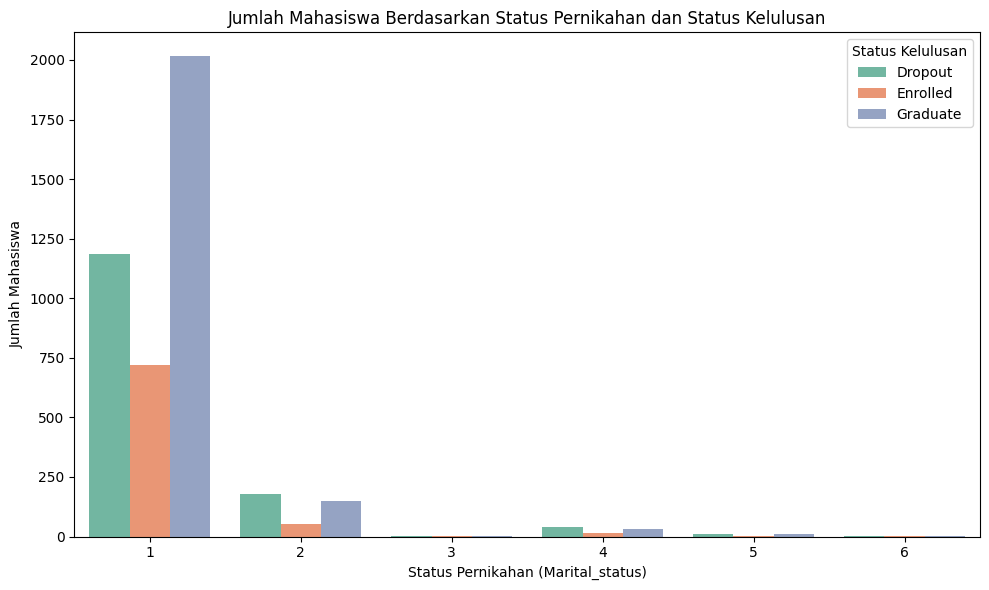

In [ ]:
# Bagaimana pengaruh status pernikahan mahasiswa terhadap keberhasilan akademik mereka?
# jumlah mahasiswa berdasarkan Marital_status dan Status
grouped = df.groupby(['Marital_status', 'Status']).size().reset_index(name='Jumlah')

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped,
            x='Marital_status',
            y='Jumlah',
            hue='Status',
            palette='Set2')

plt.title('Jumlah Mahasiswa Berdasarkan Status Pernikahan dan Status Kelulusan')
plt.xlabel('Status Pernikahan (Marital_status)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status Kelulusan')
plt.tight_layout()
plt.show()


In [13]:
print("Jumlah Mahasiswa Berdasarkan Status Pernikahan dan Status Kelulusan:")
print(grouped)

Jumlah Mahasiswa Berdasarkan Status Pernikahan dan Status Kelulusan:
    Marital_status    Status  Jumlah
0                1   Dropout    1184
1                1  Enrolled     720
2                1  Graduate    2015
3                2   Dropout     179
4                2  Enrolled      52
5                2  Graduate     148
6                3   Dropout       1
7                3  Enrolled       2
8                3  Graduate       1
9                4   Dropout      42
10               4  Enrolled      16
11               4  Graduate      33
12               5   Dropout      11
13               5  Enrolled       3
14               5  Graduate      11
15               6   Dropout       4
16               6  Enrolled       1
17               6  Graduate       1


Berdasarkan distribusi mahasiswa menurut status pernikahan dan status kelulusan, mayoritas mahasiswa berasal dari kelompok single (belum menikah). Dari total mahasiswa single, sebanyak 2.015 orang berhasil lulus, 720 masih aktif (enrolled), dan 1.184 mengalami dropout. Sementara itu, mahasiswa yang sudah menikah memiliki jumlah yang jauh lebih sedikit, yakni 148 lulus, 52 masih aktif, dan 179 dropout. Kelompok lainnya seperti divorced, facto union, legally separated, dan widower memiliki jumlah mahasiswa yang relatif kecil, namun kasus dropout tetap ditemukan di semua kelompok.

Temuan ini mengindikasikan bahwa mahasiswa single tidak hanya mendominasi jumlah keseluruhan, tetapi juga menyumbang jumlah dropout terbanyak. Oleh karena itu, status pernikahan dapat dijadikan salah satu pertimbangan dalam menyusun strategi pencegahan dropout. Institusi dapat mengembangkan program pendampingan dan konseling yang ditujukan khusus untuk mahasiswa yang belum menikah, guna membantu mereka dalam menghadapi tantangan akademik maupun psikologis selama masa studi. Pendekatan ini diharapkan dapat meningkatkan retensi mahasiswa dan mendorong penyelesaian studi tepat waktu.

C:\Users\Yogik\AppData\Local\Temp\ipykernel_13900\4154090857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Age_at_enrollment', palette='Set2')


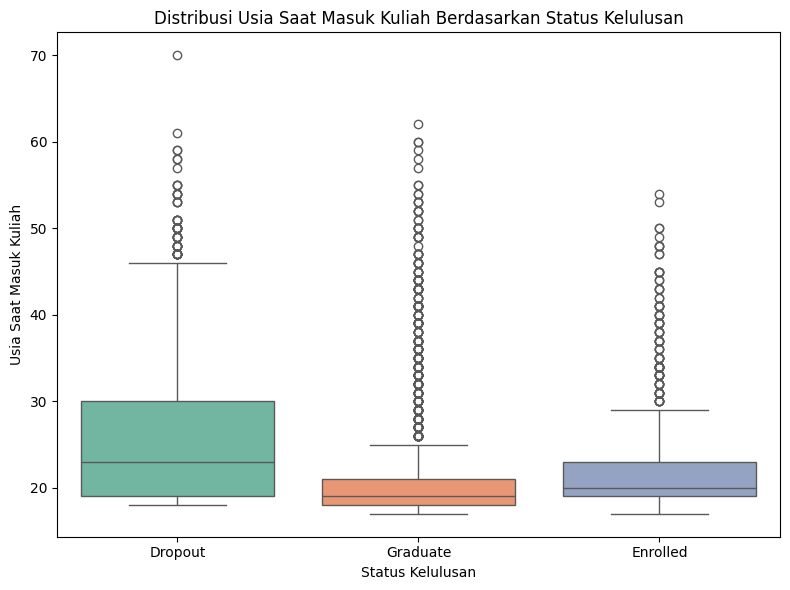

In [14]:
# Bagaimana usia saat masuk kuliah(Age\_at\_enrollment ) berpengaruh terhadap pencapaian akademik?
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Status', y='Age_at_enrollment', palette='Set2')
plt.title('Distribusi Usia Saat Masuk Kuliah Berdasarkan Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Usia Saat Masuk Kuliah')
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(df['Age_at_enrollment'], df['Status'])

Status,Dropout,Enrolled,Graduate
Age_at_enrollment,,,
17,0,2,3
18,202,172,662
19,207,157,547
20,133,140,326
21,93,70,159
22,58,37,79
23,41,24,43
24,56,30,45
25,47,21,25


Berdasarkan distribusi status kelulusan terhadap usia saat pendaftaran, mayoritas mahasiswa yang mengalami *dropout* maupun kelulusan berada pada rentang usia 18 hingga 20 tahun. Usia 18 tahun mencatat jumlah lulusan terbanyak sebanyak 662 orang, namun juga memiliki angka *dropout* yang tinggi, yaitu 202 orang. Hal serupa terjadi pada usia 19 dan 20 tahun. Di sisi lain, semakin bertambah usia saat pendaftaran, jumlah mahasiswa cenderung menurun, namun kasus *dropout* tetap terjadi hingga usia lanjut, bahkan hingga usia 70 tahun.

Temuan ini menunjukkan bahwa usia saat masuk kuliah memiliki korelasi terhadap tingkat keberhasilan studi. Oleh karena itu, institusi dapat mempertimbangkan kebijakan pembinaan yang lebih intensif bagi mahasiswa muda, terutama pada masa transisi awal perkuliahan, untuk menekan potensi *dropout*. Selain itu, pendekatan pembelajaran yang lebih fleksibel juga dapat dipertimbangkan bagi mahasiswa yang berusia lebih tua, mengingat tantangan personal atau profesional yang mungkin mereka hadapi. Pendekatan ini diharapkan dapat meningkatkan retensi dan menyukseskan proses pendidikan lintas kelompok usia.


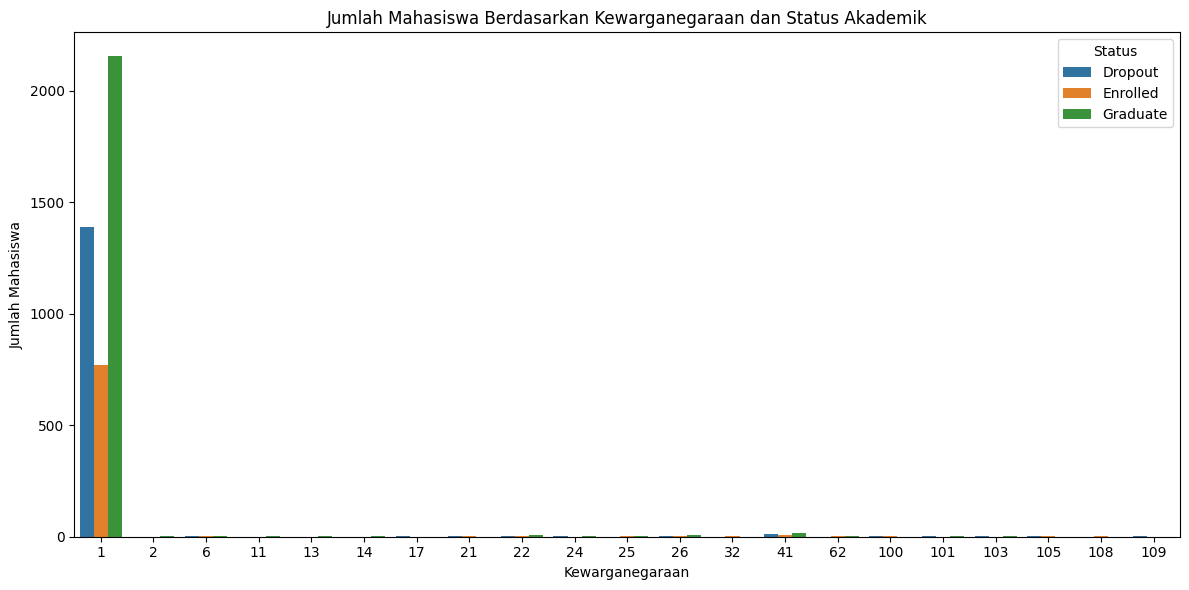

In [15]:
# Apakah mahasiswa internasional memiliki tingkat keberhasilan akademik berbeda dengan mahasiswa lokal?
# Hitung jumlah mahasiswa per nationality dan status
status_by_nationality = df.groupby(['Nacionality', 'Status']).size().reset_index(name='Jumlah') 

# Visualisasi bar chart jumlah mahasiswa per kewarganegaraan berdasarkan status
plt.figure(figsize=(12,6))
sns.barplot(data=status_by_nationality, x='Nacionality', y='Jumlah', hue='Status') 
plt.title('Jumlah Mahasiswa Berdasarkan Kewarganegaraan dan Status Akademik')
plt.xlabel('Kewarganegaraan')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [16]:
print("Distribusi Mahasiswa Berdasarkan Kewarganegaraan:")
print(df['Nacionality'].value_counts())

Distribusi Mahasiswa Berdasarkan Kewarganegaraan:
Nacionality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64


Berdasarkan distribusi kewarganegaraan, mayoritas mahasiswa berasal dari Portugal dengan jumlah sebanyak 4.314 orang, yang berarti lebih dari 90% populasi mahasiswa berasal dari dalam negeri. Sementara itu, kewarganegaraan lainnya seperti Brasil, Santome, dan Cape Verde mencatat jumlah yang jauh lebih kecil, berkisar antara 1 hingga 38 mahasiswa. Beberapa kewarganegaraan seperti Kolombia, Kuba, dan Turki bahkan hanya diwakili oleh satu orang mahasiswa.

Temuan ini menunjukkan bahwa populasi mahasiswa di institusi ini masih sangat didominasi oleh warga negara Portugal. Untuk meningkatkan keragaman dan inklusivitas, institusi dapat mempertimbangkan strategi internasionalisasi, seperti kerja sama dengan universitas luar negeri, program beasiswa untuk mahasiswa internasional, atau promosi kampus di kawasan berbahasa Portugis dan sekitarnya. Langkah-langkah ini tidak hanya akan memperkaya lingkungan akademik, tetapi juga memperluas jejaring internasional kampus secara strategis.

In [17]:
status_by_nationality

,Nacionality,Status,Jumlah
0,1,Dropout,1389
1,1,Enrolled,770
2,1,Graduate,2155
3,2,Graduate,2
4,6,Dropout,4
5,6,Enrolled,5
6,6,Graduate,4
7,11,Graduate,3
8,13,Graduate,1
9,14,Graduate,1


Berdasarkan distribusi kewarganegaraan terhadap status kelulusan, mayoritas mahasiswa yang dropout, enrolled, maupun graduate berasal dari Portugal (kode 1), dengan rincian 1.389 orang dropout, 770 masih aktif, dan 2.155 telah lulus. Mahasiswa dari negara lain seperti Brasil (kode 41), Spanyol (6), dan Cape Verde (22) juga tercatat dalam data, namun jumlahnya jauh lebih sedikit. Di antara mahasiswa non-Portugis, mahasiswa asal Brasil menunjukkan jumlah kelulusan terbanyak, yakni 18 orang, disusul oleh Cape Verde (8 orang) dan Santome (8 orang). Meski demikian, kasus dropout tetap terjadi pada hampir semua kewarganegaraan.

Temuan ini memperkuat fakta bahwa mahasiswa domestik tetap mendominasi secara jumlah dan kontribusi pada angka dropout. Namun, tingkat dropout yang terjadi juga melibatkan mahasiswa internasional, meskipun dalam jumlah kecil. Oleh karena itu, institusi perlu tidak hanya fokus pada mahasiswa lokal, tetapi juga mulai memperhatikan tantangan yang mungkin dihadapi oleh mahasiswa internasional, seperti kendala bahasa, adaptasi budaya, atau akses ke layanan pendukung. Disarankan untuk menyediakan program orientasi dan pendampingan khusus bagi mahasiswa asing guna meningkatkan pengalaman belajar mereka serta menurunkan risiko dropout di kelompok ini.

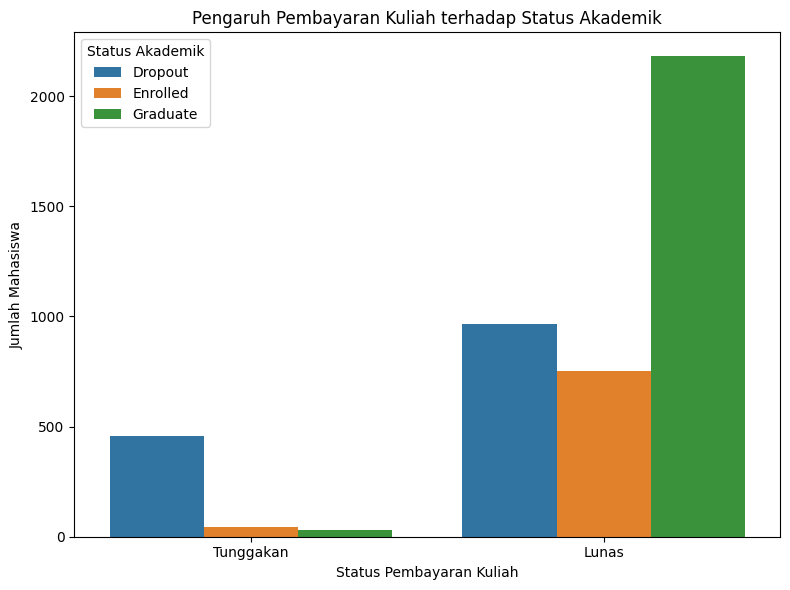

In [18]:
# Apa pengaruh mahasiswa telah membayar biaya kuliah mereka tepat waktu atau belum terhadap Status Akademik?
status_biaya = df.groupby(['Tuition_fees_up_to_date', 'Status']).size().reset_index(name='Jumlah')

# Mengubah nilai Tuition_fees_up_to_date 
status_biaya['Tuition_fees_up_to_date'] = status_biaya['Tuition_fees_up_to_date'].map({0: 'Tunggakan', 1: 'Lunas'})

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=status_biaya, x='Tuition_fees_up_to_date', y='Jumlah', hue='Status')
plt.title('Pengaruh Pembayaran Kuliah terhadap Status Akademik')
plt.xlabel('Status Pembayaran Kuliah')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status Akademik')
plt.tight_layout()
plt.show()

In [19]:
status_biaya

,Tuition_fees_up_to_date,Status,Jumlah
0,Tunggakan,Dropout,457
1,Tunggakan,Enrolled,42
2,Tunggakan,Graduate,29
3,Lunas,Dropout,964
4,Lunas,Enrolled,752
5,Lunas,Graduate,2180


Berdasarkan data status pembayaran biaya kuliah terhadap status mahasiswa, terlihat bahwa mahasiswa dengan pembayaran lunas mendominasi jumlah kelulusan sebanyak 2.180 orang, serta jumlah mahasiswa yang masih aktif (752) dan dropout (964) juga lebih banyak dibandingkan dengan mahasiswa yang memiliki tunggakan biaya kuliah. Mahasiswa dengan tunggakan biaya menunjukkan jumlah dropout sebanyak 457 orang, yang proporsinya cukup signifikan jika dibandingkan dengan jumlah mahasiswa enrolled (42) dan lulusan (29) dalam kelompok ini.

Temuan ini menunjukkan bahwa keterlambatan atau tunggakan pembayaran biaya kuliah berpotensi menjadi indikator risiko dropout yang cukup tinggi. Oleh karena itu, institusi perlu mengembangkan mekanisme monitoring dan pendampingan pembayaran biaya yang lebih efektif, serta memberikan kemudahan atau solusi seperti program cicilan, beasiswa, atau konsultasi keuangan. Langkah ini diharapkan dapat membantu mahasiswa mengelola keuangan studi mereka dengan lebih baik sehingga mengurangi risiko dropout akibat masalah finansial.

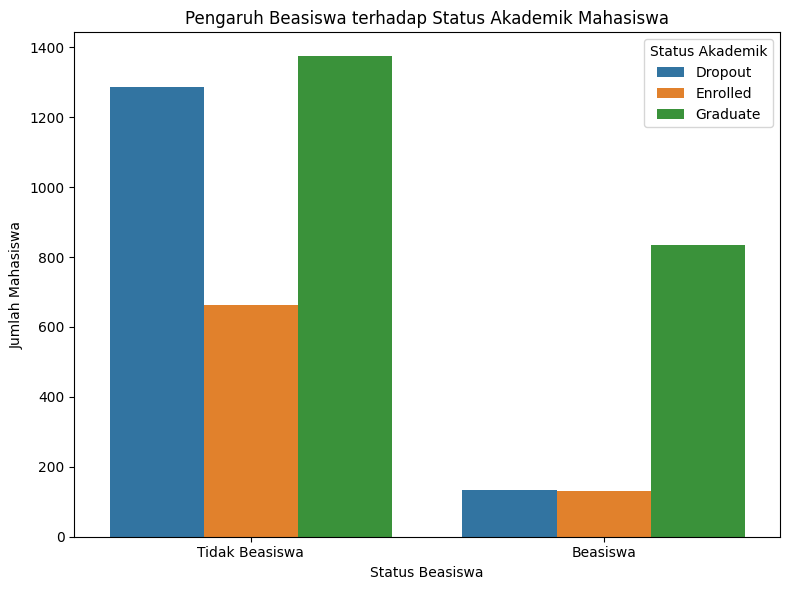

In [20]:
# Apakah status mahasiswa sebagai pemegang beasiswa berhubungan dengan performa akademik?
# Hitung jumlah mahasiswa
scholar_status = df.groupby(['Scholarship_holder', 'Status']).size().reset_index(name='Jumlah')

# Ganti nilai Scholarship_holder
scholar_status['Scholarship_holder'] = scholar_status['Scholarship_holder'].map({0: 'Tidak Beasiswa', 1: 'Beasiswa'})

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=scholar_status, x='Scholarship_holder', y='Jumlah', hue='Status')
plt.title('Pengaruh Beasiswa terhadap Status Akademik Mahasiswa')
plt.xlabel('Status Beasiswa')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status Akademik')
plt.tight_layout()
plt.show()

In [21]:
scholar_status

,Scholarship_holder,Status,Jumlah
0,Tidak Beasiswa,Dropout,1287
1,Tidak Beasiswa,Enrolled,664
2,Tidak Beasiswa,Graduate,1374
3,Beasiswa,Dropout,134
4,Beasiswa,Enrolled,130
5,Beasiswa,Graduate,835


Data menunjukkan bahwa mahasiswa yang tidak menerima beasiswa memiliki jumlah dropout yang jauh lebih tinggi, yaitu 1.287 orang, dibandingkan dengan mahasiswa penerima beasiswa yang dropout sebanyak 134 orang. Selain itu, jumlah mahasiswa yang lulus dan masih aktif juga lebih besar pada kelompok tanpa beasiswa, namun secara proporsional, mahasiswa penerima beasiswa memiliki tingkat kelulusan yang cukup baik dengan 835 orang lulus dari total yang ada.

Temuan ini mengindikasikan bahwa penerimaan beasiswa dapat berperan penting dalam menurunkan risiko dropout mahasiswa. Oleh karena itu, institusi disarankan untuk memperluas program beasiswa dan memberikan dukungan finansial yang lebih banyak kepada mahasiswa berprestasi atau yang membutuhkan, sebagai upaya strategis untuk meningkatkan retensi dan keberhasilan studi. Selain itu, pendampingan dan monitoring khusus untuk mahasiswa tanpa beasiswa juga perlu diperkuat agar dapat mengidentifikasi lebih dini risiko dropout akibat keterbatasan biaya.

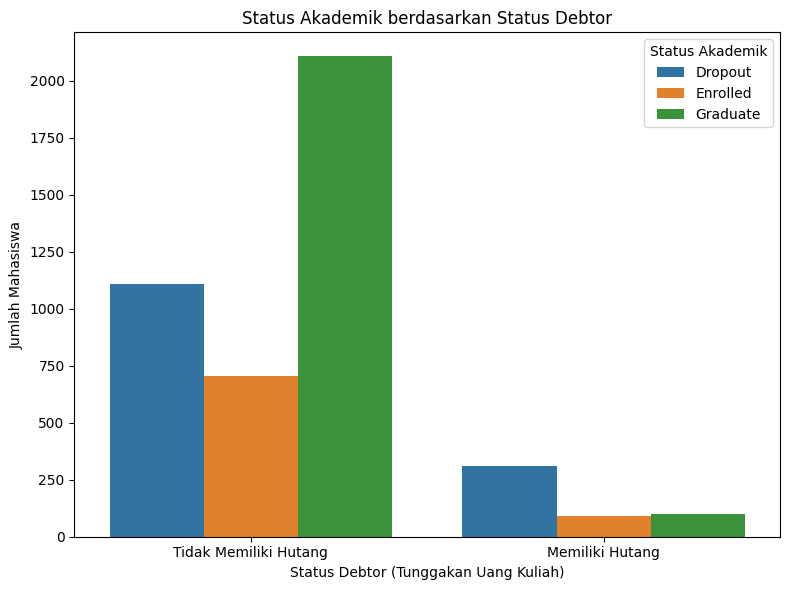

In [22]:
status_debtor = df.groupby(['Debtor', 'Status']).size().reset_index(name='Jumlah')
status_debtor['Debtor'] = status_debtor['Debtor'].map({0: 'Tidak Memiliki Hutang', 1: 'Memiliki Hutang'})

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=status_debtor, x='Debtor', y='Jumlah', hue='Status')
plt.title('Status Akademik berdasarkan Status Debtor')
plt.xlabel('Status Debtor (Tunggakan Uang Kuliah)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status Akademik')
plt.tight_layout()
plt.show()

In [46]:
status_debtor

,Debtor,Status,Jumlah
0,Tidak Memiliki Hutang,Dropout,1109
1,Tidak Memiliki Hutang,Enrolled,704
2,Tidak Memiliki Hutang,Graduate,2108
3,Memiliki Hutang,Dropout,312
4,Memiliki Hutang,Enrolled,90
5,Memiliki Hutang,Graduate,101


Data menunjukkan bahwa mahasiswa yang tidak memiliki hutang jauh lebih banyak baik yang lulus (2.108 orang), masih aktif (704), maupun yang dropout (1.109), dibandingkan dengan mahasiswa yang memiliki hutang, yang jumlahnya lebih kecil di semua kategori, yaitu 101 lulus, 90 masih aktif, dan 312 dropout. Namun, proporsi dropout di antara mahasiswa yang memiliki hutang relatif lebih tinggi dibandingkan dengan yang tidak memiliki hutang.

Hal ini mengindikasikan bahwa kepemilikan hutang dapat menjadi faktor risiko yang signifikan terhadap kemungkinan mahasiswa mengalami dropout. Oleh karena itu, institusi perlu memberikan perhatian khusus pada mahasiswa yang memiliki hutang dengan menyediakan program konseling keuangan dan manajemen utang. Selain itu, pengembangan program bantuan finansial atau beasiswa yang dapat membantu meringankan beban hutang mahasiswa diharapkan dapat meningkatkan tingkat kelulusan dan mengurangi angka dropout.

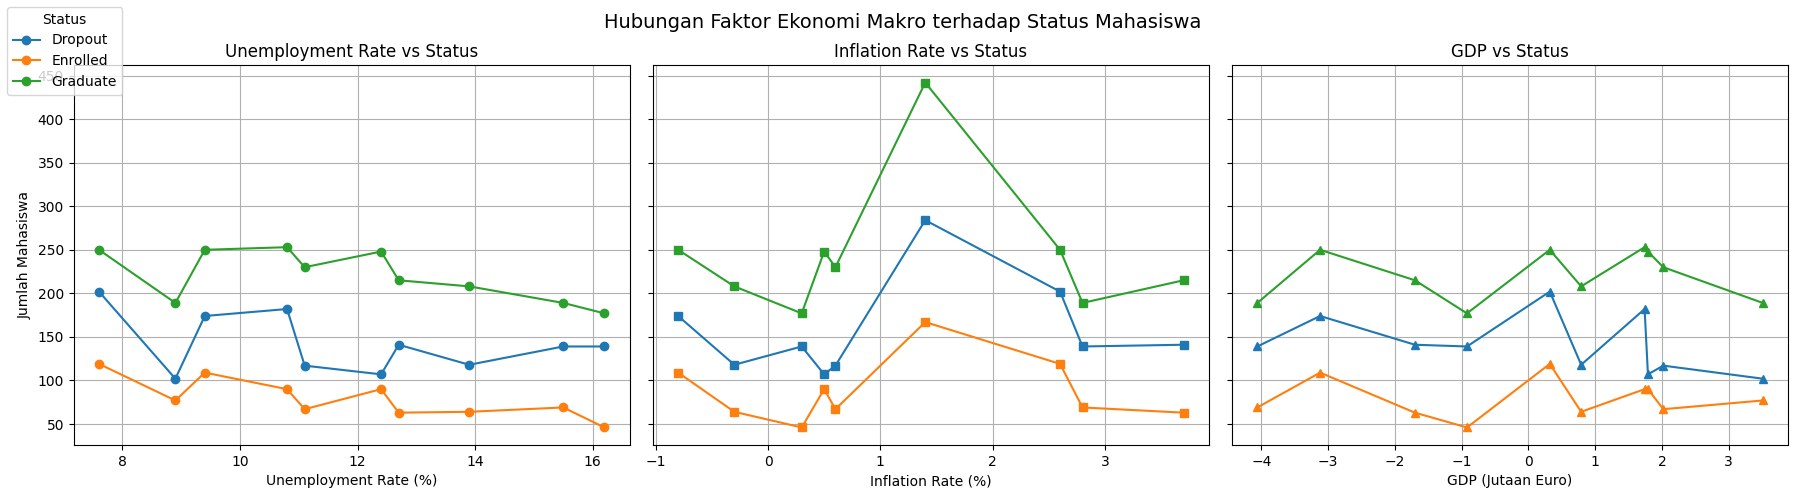

In [23]:
# Bagaimana kondisi ekonomi makro (tingkat pengangguran, inflasi, GDP) berhubungan dengan performa mahasiswa?
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# 1. UNEMPLOYMENT RATE
grouped1 = df.groupby(['Unemployment_rate', 'Status']).size().unstack().fillna(0)
for status in grouped1.columns:
    axes[0].plot(grouped1.index, grouped1[status], marker='o', label=status)
axes[0].set_title('Unemployment Rate vs Status')
axes[0].set_xlabel('Unemployment Rate (%)')
axes[0].set_ylabel('Jumlah Mahasiswa')
axes[0].grid(True)

# 2. INFLATION RATE
grouped2 = df.groupby(['Inflation_rate', 'Status']).size().unstack().fillna(0)
for status in grouped2.columns:
    axes[1].plot(grouped2.index, grouped2[status], marker='s', label=status)
axes[1].set_title('Inflation Rate vs Status')
axes[1].set_xlabel('Inflation Rate (%)')
axes[1].grid(True)

# 3. GDP
grouped3 = df.groupby(['GDP', 'Status']).size().unstack().fillna(0)
for status in grouped3.columns:
    axes[2].plot(grouped3.index, grouped3[status], marker='^', label=status)
axes[2].set_title('GDP vs Status')
axes[2].set_xlabel('GDP (Jutaan Euro)')
axes[2].grid(True)

# TAMBAHKAN LEGEND DI LUAR SUBPLOT
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Status', loc='upper left', ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Hubungan Faktor Ekonomi Makro terhadap Status Mahasiswa', fontsize=14)
plt.show()

In [47]:
grouped1 , grouped2 , grouped3

(Status             Dropout  Enrolled  Graduate
 Unemployment_rate                             
 7.6                    202       119       250
 8.9                    102        77       189
 9.4                    174       109       250
 10.8                   182        90       253
 11.1                   117        67       230
 12.4                   107        90       248
 12.7                   141        63       215
 13.9                   118        64       208
 15.5                   139        69       189
 16.2                   139        46       177,
 Status          Dropout  Enrolled  Graduate
 Inflation_rate                             
 -0.8                174       109       250
 -0.3                118        64       208
  0.3                139        46       177
  0.5                107        90       248
  0.6                117        67       230
  1.4                284       167       442
  2.6                202       119       250
  2.8             

Berdasarkan data tingkat pengangguran (unemployment rate), inflasi (inflation rate), dan Produk Domestik Bruto (GDP) terhadap status mahasiswa (dropout, enrolled, graduate), terdapat pola yang menarik. Secara umum, pada tingkat pengangguran dan inflasi yang lebih tinggi, angka *dropout* mahasiswa cenderung meningkat, sementara jumlah lulusan dan mahasiswa aktif menurun. Hal ini menunjukkan bahwa kondisi ekonomi makro yang kurang stabil dapat berdampak negatif pada keberlangsungan studi mahasiswa. Oleh karena itu, institusi pendidikan disarankan untuk memperkuat program pendukung akademik dan finansial, terutama di masa kondisi ekonomi yang sulit, serta menyediakan layanan konseling dan bantuan agar mahasiswa tetap termotivasi dan mampu menyelesaikan studinya meskipun menghadapi tantangan eksternal.


<Figure size 800x600 with 0 Axes>

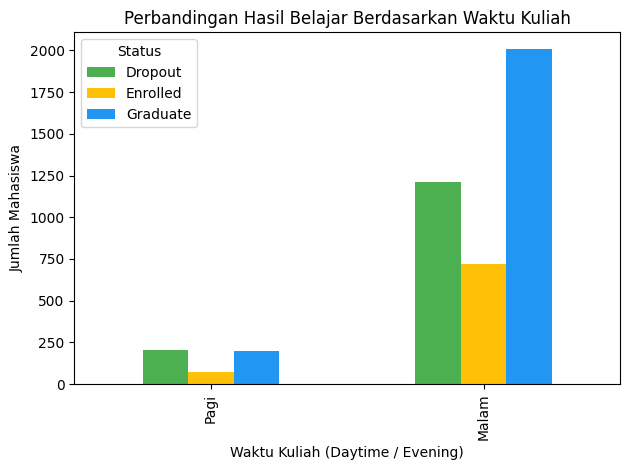

In [24]:
# Apakah ada perbedaan tingkat keberhasilan antara mahasiswa yang kuliah di siang hari dengan malam hari?
attendance_status = df.groupby(['Daytime_evening_attendance', 'Status']).size().unstack().fillna(0)

# Membuat Bar Chart
plt.figure(figsize=(8,6))
attendance_status.plot(kind='bar', stacked=False, color=['#4CAF50','#FFC107','#2196F3'])

# Mengubah keterangan di sumbu X
plt.xticks(ticks=range(len(attendance_status.index)), labels=['Pagi', 'Malam'])

plt.title('Perbandingan Hasil Belajar Berdasarkan Waktu Kuliah')
plt.xlabel('Waktu Kuliah (Daytime / Evening)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


In [48]:
attendance_status

Status,Dropout,Enrolled,Graduate
Daytime_evening_attendance,,,
0,207,75,201
1,1214,719,2008


Data menunjukkan bahwa mahasiswa yang mengikuti kelas pagi (daytime) berjumlah lebih sedikit dibandingkan dengan mahasiswa kelas sore (evening). Namun, meskipun jumlah mahasiswa sore lebih besar, angka dropout pada kelompok sore (1.214) juga jauh lebih tinggi dibandingkan dengan kelompok pagi (207). Sementara itu, lulusan pada kelas sore juga lebih banyak (2.008) dibanding kelas pagi (201).

Temuan ini mengindikasikan bahwa meskipun kelas sore memiliki jumlah mahasiswa lebih banyak, tingkat risiko dropout di kelompok ini juga lebih tinggi secara absolut. Oleh karena itu, institusi perlu memperhatikan kebutuhan dan tantangan khusus mahasiswa kelas sore, misalnya terkait pengaturan waktu, beban kerja, atau faktor eksternal lainnya. Penguatan program pendampingan dan fleksibilitas belajar di kelas sore dapat membantu menurunkan angka dropout sekaligus meningkatkan keberhasilan studi.

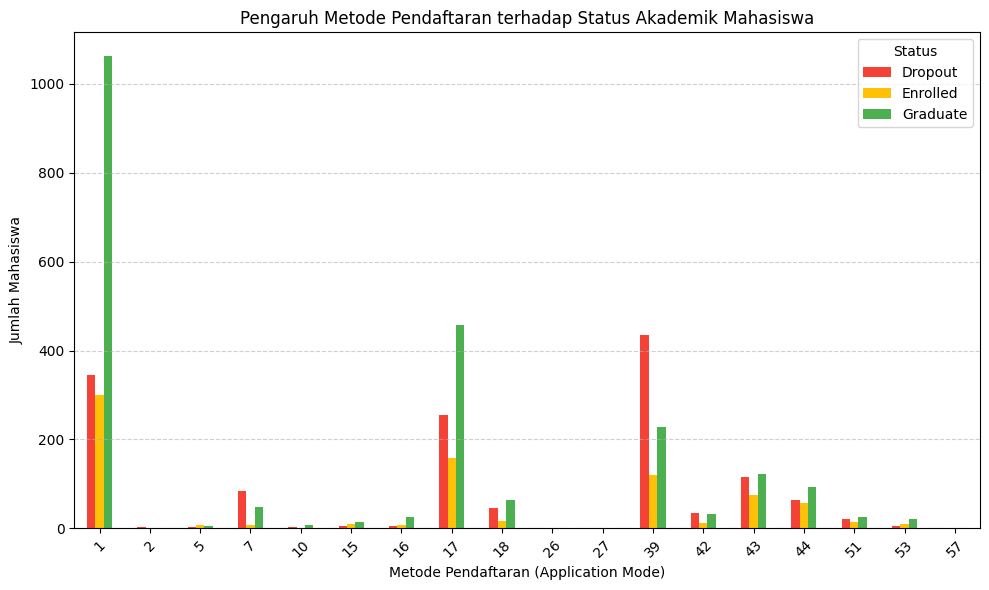

In [25]:
# Apakah metode pendaftaran (application mode) berpengaruh pada tingkat kelulusan mahasiswa?
application_status = df.groupby(['Application_mode', 'Status']).size().unstack().fillna(0)

# BUAT BAR CHART
application_status.plot(kind='bar', figsize=(10,6), color=['#F44336', '#FFC107', '#4CAF50'])

plt.title('Pengaruh Metode Pendaftaran terhadap Status Akademik Mahasiswa')
plt.xlabel('Metode Pendaftaran (Application Mode)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [26]:
application_status

Status,Dropout,Enrolled,Graduate
Application_mode,,,
1,345.0,300.0,1063.0
2,2.0,0.0,1.0
5,2.0,8.0,6.0
7,85.0,7.0,47.0
10,3.0,0.0,7.0
15,5.0,10.0,15.0
16,5.0,8.0,25.0
17,256.0,159.0,457.0
18,45.0,16.0,63.0


Dari data distribusi mahasiswa berdasarkan Application_mode atau jalur masuk, terlihat beberapa pola penting:

- Jalur masuk 1 (1st phase - general contingent) adalah yang terbanyak, dengan 345 dropout, 300 masih aktif, dan 1.063
lulus. Ini menunjukkan jalur utama penerimaan mahasiswa.
- Jalur 39 (Over 23 years old) juga signifikan dengan 435 dropout, yang merupakan angka dropout tertinggi dibanding jalur lain, disusul 121 masih aktif dan 229 lulus. Hal ini mengindikasikan mahasiswa yang berusia di atas 23 tahun memiliki risiko dropout lebih tinggi.
- Jalur 17 (2nd phase - general contingent) memiliki jumlah mahasiswa yang cukup besar, dengan 256 dropout, 159 masih aktif, dan 457 lulus.
- Jalur 43 (Change of course) dan 44 (Technological specialization diploma holders) menunjukkan angka dropout yang cukup tinggi (115 dan 63 masing-masing), menandakan perubahan jurusan atau latar belakang diploma teknis juga berhubungan dengan risiko dropout.

Fokus perhatian perlu diberikan pada mahasiswa jalur Over 23 years old (39) dan yang melakukan change of course (43) atau berasal dari jalur khusus seperti technological specialization (44) karena mereka memiliki risiko dropout yang lebih tinggi. Program pendampingan, konseling akademik, dan penguatan motivasi belajar dapat diterapkan khusus untuk kelompok ini guna meningkatkan retensi dan tingkat kelulusan mereka.

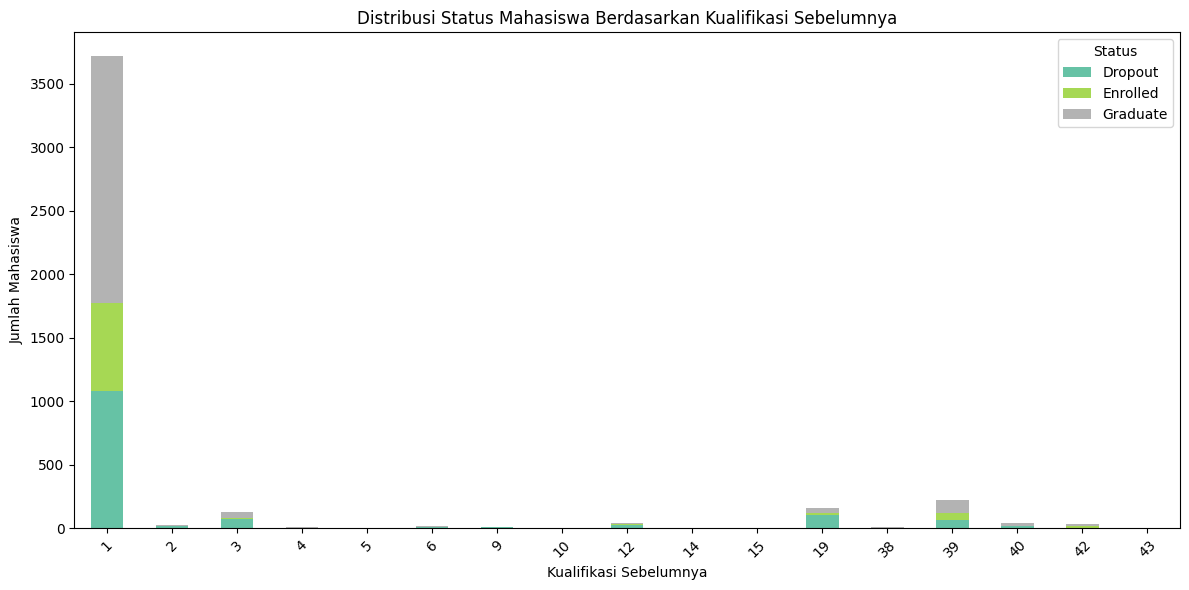

In [27]:
# Bagaimana latar belakang kualifikasi pendidikan sebelumnya mempengaruhi nilai akademik mahasiswa?
pivot_qual = df.pivot_table(index='Previous_qualification', columns='Status', values='Admission_grade', aggfunc='count', fill_value=0)

# Plot
pivot_qual.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title('Distribusi Status Mahasiswa Berdasarkan Kualifikasi Sebelumnya')
plt.xlabel('Kualifikasi Sebelumnya')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [50]:
pivot_qual

Status,Dropout,Enrolled,Graduate
Previous_qualification,,,
1,1078,698,1941
2,16,1,6
3,75,4,47
4,4,1,3
5,1,0,0
6,7,1,8
9,11,0,0
10,3,0,1
12,26,6,13


Dari data distribusi mahasiswa berdasarkan kualifikasi pendidikan sebelumnya, mayoritas mahasiswa memiliki latar belakang pendidikan menengah (Secondary education) dengan jumlah terbesar pada ketiga status, yaitu 1.078 dropout, 698 masih aktif, dan 1.941 lulus. Kelompok ini menjadi kontributor utama pada keseluruhan populasi mahasiswa.

Selain itu, kelompok dengan kualifikasi seperti Basic education 3rd cycle (19) dan Technological specialization course (39) juga menunjukkan angka dropout yang cukup signifikan, masing-masing 104 dan 69 orang. Sementara itu, mahasiswa dengan kualifikasi pendidikan tinggi seperti sarjana, magister, dan doktor jumlahnya relatif kecil dan memiliki angka dropout yang rendah.

Untuk mengurangi risiko dropout, institusi sebaiknya memberikan perhatian khusus pada mahasiswa dengan latar belakang pendidikan menengah dan basic education, terutama yang mungkin kurang siap menghadapi tuntutan pendidikan tinggi. Program persiapan akademik tambahan, bimbingan belajar, dan pendampingan intensif dapat membantu meningkatkan tingkat kelulusan dan menurunkan angka dropout pada kelompok ini.

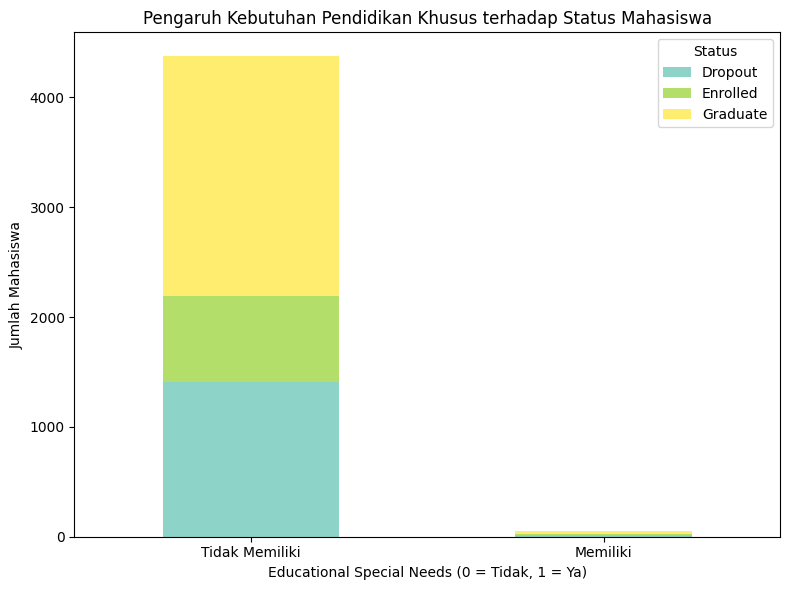

In [28]:
# Bagaimana pengaruh kebutuhan pendidikan khusus (educational special needs) terhadap keberhasilan akademik?
edu_needs_status = df.groupby(['Educational_special_needs', 'Status']).size().unstack(fill_value=0)

# Plot
edu_needs_status.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set3')

plt.title('Pengaruh Kebutuhan Pendidikan Khusus terhadap Status Mahasiswa')
plt.xlabel('Educational Special Needs (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.xticks([0, 1], ['Tidak Memiliki', 'Memiliki'], rotation=0)
plt.tight_layout()
plt.show()

In [49]:
edu_needs_status

Status,Dropout,Enrolled,Graduate
Educational_special_needs,,,
0,1404,783,2186
1,17,11,23


Data menunjukkan bahwa mahasiswa dengan kebutuhan khusus pendidikan (educational special needs) berjumlah sangat sedikit dibandingkan dengan mahasiswa tanpa kebutuhan khusus. Meski jumlahnya kecil, mahasiswa dengan kebutuhan khusus juga mengalami dropout (17 orang), masih aktif (11 orang), dan yang lulus (23 orang).

Karena proporsi mahasiswa dengan kebutuhan khusus relatif kecil tetapi tetap mengalami dropout, institusi perlu memberikan perhatian khusus dan dukungan yang lebih intensif untuk kelompok ini. Penyediaan fasilitas dan layanan pendampingan khusus, seperti aksesibilitas, tutor pribadi, atau konseling, sangat penting agar mahasiswa berkebutuhan khusus dapat menyelesaikan studi dengan sukses dan mengurangi risiko dropout.

## Modeling

Penggunaan pembelajaran mesin (prediksi) digunakan untuk mengidentifikasi mahasiswa dengan risiko tinggi mengalami dropout berdasarkan berbagai faktor, sehingga institusi dapat mengambil tindakan preventif yang tepat, seperti memberikan bimbingan khusus atau program pendukung, guna meningkatkan retensi mahasiswa dan tingkat kelulusan secara keseluruhan.


In [ ]:
df_copy = df.copy()
df_copy = df_copy[df_copy['Status'].isin(['Graduate', 'Dropout'])]

selected_columns = [
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Previous_qualification_grade',
    'Admission_grade',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Age_at_enrollment',
    'International',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP',
    'Status'
]

df_copy = df_copy[selected_columns].copy()

# Encode kolom kategorik
categorical_columns = df_copy.select_dtypes(include='object').columns.drop('Status')
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le

# Encode target
df_copy['Status'] = df_copy['Status'].map({'Graduate': 1, 'Dropout': 0})

X = df_copy.drop('Status', axis=1)
y = df_copy['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

joblib.dump(best_model, 'student_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(X_train.columns.tolist(), 'X_train_columns.pkl')

Fitting 3 folds for each of 24 candidates, totalling 72 fits


['X_train_columns.pkl']

## Evaluation

In [40]:
# Evaluasi
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print("📋 Best Parameters:", grid_search.best_params_)

Accuracy: 0.9118
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       284
           1       0.89      0.98      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.92      0.91      0.91       726

📋 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [42]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


## Melakukan Pengembalian Nilai String

In [5]:
df_dashboard = df.copy()

In [6]:
df_dashboard

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,1.266667e+16,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,1.100000e+01,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,1.350000e+01,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,1.200000e+01,0,9.4,-0.8,-3.12,Graduate


In [7]:
# dictionary mapping
marital_status_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}
df_dashboard['Marital_status'] = df_dashboard['Marital_status'].map(marital_status_mapping)


In [10]:
# dictionary mapping
aplication_mode_mapping = {
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
}

df_dashboard['Application_mode'] = df_dashboard['Application_mode'].map(aplication_mode_mapping)


In [11]:
# fungsi konversi
def convert_application_order(value):
    if value == 0:
        return '1st choice'
    elif value == 1:
        return '2nd choice'
    elif value == 2:
        return '3rd choice'
    elif value == 3:
        return '4th choice'
    elif value == 4:
        return '5th choice'
    elif value == 5:
        return '6th choice'
    elif value == 6:
        return '7th choice'
    elif value == 7:
        return '8th choice'
    elif value == 8:
        return '9th choice'
    elif value == 9:
        return '10th choice'
    else:
        return 'Unknown'

# Terapkan ke kolom Application_order
df_dashboard['Application_order'] = df_dashboard['Application_order'].apply(convert_application_order)


In [12]:
# Buat dictionary mapping
course_mapping = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

# Terapkan mapping ke kolom Course
df_dashboard['Course'] = df_dashboard['Course'].map(course_mapping)


In [13]:
# dictionary mapping
attendance_mapping = {
    1: "daytime",
    0: "evening"
}

# Terapkan mapping ke kolom Daytime_evening_attendance
df_dashboard['Daytime_evening_attendance'] = df_dashboard['Daytime_evening_attendance'].map(attendance_mapping)


In [14]:
#  dictionary mapping
previous_qualification_mapping = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}

# Terapkan mapping ke kolom Previous_qualification
df_dashboard['Previous_qualification'] = df_dashboard['Previous_qualification'].map(previous_qualification_mapping)


In [15]:
# dictionary mapping
nacionality_mapping = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

# Terapkan mapping ke kolom Nacionality
df_dashboard['Nacionality'] = df_dashboard['Nacionality'].map(nacionality_mapping)


In [16]:
# dictionary mapping
mothers_qualification_mapping = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-professional course",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

# Terapkan mapping ke kolom Mothers_qualification
df_dashboard['Mothers_qualification'] = df_dashboard['Mothers_qualification'].map(mothers_qualification_mapping)


In [17]:
# dictionary mapping
fathers_qualification_mapping = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

# Terapkan mapping ke kolom Fathers_qualification
df_dashboard['Fathers_qualification'] = df_dashboard['Fathers_qualification'].map(fathers_qualification_mapping)


In [18]:
binary_mapping = {1: "yes", 0: "no"}
gender_mapping = {1: "male", 0: "female"}

df_dashboard['Displaced'] = df_dashboard['Displaced'].map(binary_mapping)
df_dashboard['Educational_special_needs'] = df_dashboard['Educational_special_needs'].map(binary_mapping)
df_dashboard['Debtor'] = df_dashboard['Debtor'].map(binary_mapping)
df_dashboard['Tuition_fees_up_to_date'] = df_dashboard['Tuition_fees_up_to_date'].map(binary_mapping)
df_dashboard['Gender'] = df_dashboard['Gender'].map(gender_mapping)
df_dashboard['Scholarship_holder'] = df_dashboard['Scholarship_holder'].map(binary_mapping)
df_dashboard['International'] = df_dashboard['International'].map(binary_mapping)

In [19]:
df_dashboard

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),2nd choice,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,6th choice,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent,7th choice,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,1.266667e+16,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent,3rd choice,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,1.100000e+01,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent,2nd choice,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,1.350000e+01,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent,2nd choice,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,1.200000e+01,0,9.4,-0.8,-3.12,Graduate
